# PyEarthScience:  Python examples for Earth Scientists

## contour plots

### Using PyNGL

#### Contour plot with
    - unstructured data (ICON)
    - CellFill
    - filled contour areas
    - without contour line labels
    - labelbar
    - title


In [1]:
import numpy as np
import math, time
import Ngl,Nio

Retrieve time for wallclock time computation.

In [2]:
t1 = time.time()                                   #-- retrieve start time
print ""

Open and read variable and grid.

In [3]:
#--  define variables
diri  = "/Users/k204045/NCL/PyNGL/User_Guide_examples/" #-- data path
fname = "ta_ps_850.nc"                             #-- data file
gname = "r2b4_amip.nc"                             #-- grid info file

#--  open file and read variables
f = Nio.open_file(diri + fname,"r")                #-- add data file
g = Nio.open_file(diri + gname,"r")                #-- add grid file (not contained in data file!!!)

#-- read a timestep of "ta" 
var =  f.variables["ta"][0,0,:]                    #-- first time step, lev, ncells

print "-----------------------"
print f.variables["ta"]                            #-- like printVarSummary
print "-----------------------"

-----------------------
Variable: ta
Type: float
Total Size: 983040 bytes
            245760 values
Number of Dimensions: 3
Dimensions and sizes:	[time | 12] x [lev | 1] x [ncells | 20480]
Coordinates: 
            time: [19790131..19791231]
            lev: [85000..85000]
            ncells: not a coordinate variable
Number of Attributes: 7
         standard_name :	temperature
         long_name :	absolute temperature
         units :	K
         grid_type :	unstructured
         number_of_grid_in_reference :	1
         _FillValue :	-9e+33
         missing_value :	-9e+33

-----------------------


Define title string, minimum and maximum contour values, interval and levels.

In [4]:
title    = "ICON:  Surface temperature"            #-- title string
varMin   =  230                                    #-- data minimum
varMax   =  310                                    #-- data maximum
varInt   =    5                                    #-- data increment
levels   =  range(varMin,varMax,varInt)            #-- set levels array



Define the x-, y-values and the polygon points.

In [5]:
rad2deg = 45./np.arctan(1.)                        #-- radians to degrees

x      =  g.variables["clon"][:]                   #-- read clon
y      =  g.variables["clat"][:]                   #-- read clat
vlon   =  g.variables["clon_vertices"][:]          #-- read clon_vertices
vlat   =  g.variables["clat_vertices"][:]          #-- read clat_vertices

ncells =  vlon.shape[0]                            #-- number of cells
nv     =  vlon.shape[1]                            #-- number of edges

x      =  x    * rad2deg                           #-- cell center, lon
y      =  y    * rad2deg                           #-- cell center, lat
vlat   =  vlat * rad2deg                           #-- cell lattitude vertices
vlon   =  vlon * rad2deg                           #-- cell longitude vertices

#-- longitude values -180. - 180.
for j in range(1,ncells):
    for i in range(1,nv):
        if vlon[j,i] < -180. :
           vlon[j,i] = vlon[j,i] + 360.
        if vlon[j,i] > 180. :
           vlon[j,i] = vlon[j,i] - 360.

#-- print some information
print ""
print "Cell points:           ", nv
print "Cells:                 ", str(ncells)
print "Variable ta   min/max:  %.2f " % np.min(var) + "/" + " %.2f" % np.max(var)
print ""


Cell points:            3
Cells:                  20480
Variable ta   min/max:  238.28 / 294.22



Open a workstation, here x11 window.

In [6]:
#-- open a workstation
wks_type = "png"                                   #-- graphics output type
wks      =  Ngl.open_wks(wks_type,"plot_contour_unstructured_PyNGL") #-- open a workstation

Set resources.

In [7]:
res                      =  Ngl.Resources()        #-- plot mods desired.
res.cnFillOn             =  True                   #-- color plot desired
res.cnFillMode           = "CellFill"              #-- set fill mode
res.cnFillPalette        = "BlueWhiteOrangeRed"    #-- choose colormap
res.cnLinesOn            =  False                  #-- turn off contour lines
res.cnLineLabelsOn       =  False                  #-- turn off contour labels
res.cnLevelSelectionMode = "ExplicitLevels"        #-- use explicit levels
res.cnLevels             =  levels                 #-- set levels

res.lbOrientation        = "Horizontal"            #-- vertical by default
res.lbBoxLinesOn         =  False                  #-- turn off labelbar boxes
res.lbLabelFontHeightF   =  0.01                   #-- labelbar label font size

res.mpFillOn             =  False                  #-- don't use filled map
res.mpGridAndLimbOn      =  False                  #-- don't draw grid lines

res.sfXArray             =  x                      #-- transform x to mesh scalar field
res.sfYArray             =  y                      #-- transform y to mesh scalar field
res.sfXCellBounds        =  vlon                   #-- needed if set cnFillMode = "CellFill"
res.sfYCellBounds        =  vlat                   #-- needed if set cnFillMode = "CellFill"

res.tiMainString         = "Unstructured grid:  ICON" #-- title string
res.tiMainOffsetYF       =  0.03                   #-- move main title towards plot

Draw the plot.

In [8]:
#-- create the plot
plot = Ngl.contour_map(wks,var,res)  

Compute the wallclock time

In [9]:
t2 = time.time()
print "Wallclock time:  %0.3f seconds" % (t2-t1)
print ""

Ngl.delete_wks(wks)                            #-- this need to be done to close the graphics output file
Ngl.end()

Wallclock time:  0.593 seconds



Show the plot in this notebook.

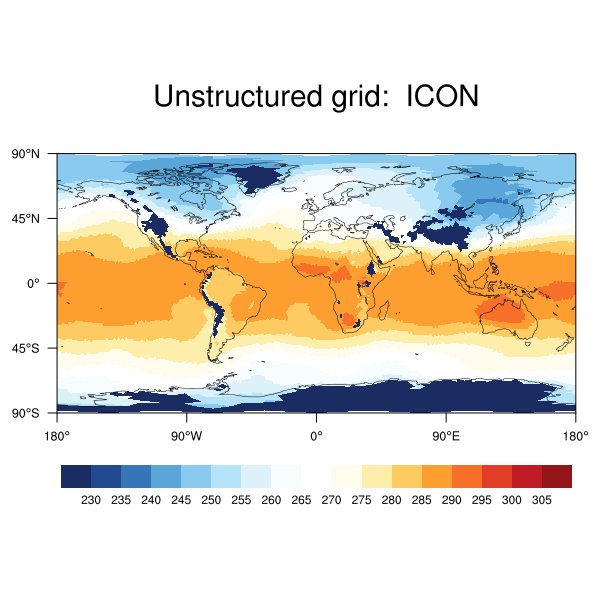

In [10]:
from IPython.display import Image
Image(filename='plot_contour_unstructured_PyNGL.png') 